In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [2]:
titanic = pd.read_csv('../Exercise Files/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Clean continuous variables

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill missing values for Age
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

<Figure size 432x288 with 0 Axes>

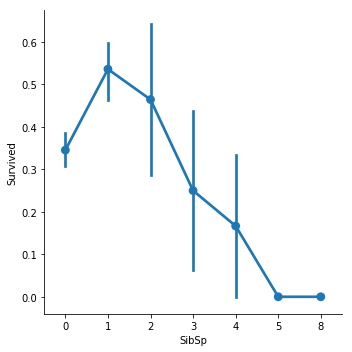

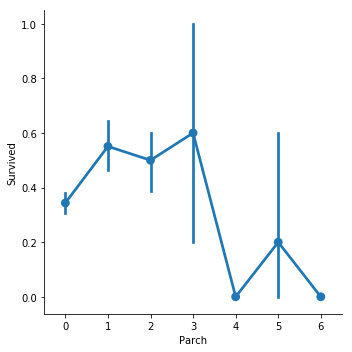

In [6]:
# Combine SibSp & Parch
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspacr=2)

In [7]:
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']

In [8]:
# Drop irrelivant/repetitive variables (SibSp, Parch, PassengerId)
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [9]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


In [10]:
# Write out cleaned data 
titanic.to_csv('../titanic_cleaned.csv', index=False)

In [11]:
# Clean categorical variables

In [12]:
# Create an indicator cariable in place of cabin
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [13]:
# Convert Sex to a numeric variable
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

In [14]:
# Drop irrelevant/repetitive variables(Cabin, Embarked, Name, Ticket)
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [16]:
# Write out cleaned data 
titanic.to_csv('../titanic_cleaned.csv', index=False)

In [17]:
# Split into train, validation and test set
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

# two step process
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [18]:
# check split
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels), 2))

0.6
0.2
0.2


In [19]:
# write out data
X_train.to_csv('../train_features.csv', index=False)
X_val.to_csv('../val_features.csv', index=False)
X_test.to_csv('../test_features.csv', index=False)

y_train.to_csv('../train_labels.csv', index=False)
y_val.to_csv('../val_labels.csv', index=False)
y_test.to_csv('../test_labels.csv', index=False)

In [20]:
tr_features = X_train
tr_labels = y_train

In [21]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)

In [22]:
scores

array([0.83333333, 0.81308411, 0.79439252, 0.80188679, 0.80188679])

In [23]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std, 3), params))

In [24]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.749 (+/-0.06) for {'max_depth': 2, 'n_estimators': 5}
0.805 (+/-0.06) for {'max_depth': 2, 'n_estimators': 50}
0.811 (+/-0.048) for {'max_depth': 2, 'n_estimators': 100}
0.805 (+/-0.02) for {'max_depth': 10, 'n_estimators': 5}
0.82 (+/-0.029) for {'max_depth': 10, 'n_estimators': 50}
0.826 (+/-0.016) for {'max_depth': 10, 'n_estimators': 100}
0.809 (+/-0.025) for {'max_depth': 20, 'n_estimators': 5}
0.824 (+/-0.016) for {'max_depth': 20, 'n_estimators': 50}
0.811 (+/-0.019) for {'max_depth': 20, 'n_estimators': 100}
0.801 (+/-0.016) for {'max_depth': None, 'n_estimators': 5}
0.807 (+/-0.02) for {'max_depth': None, 'n_estimators': 50}
0.807 (+/-0.016) for {'max_depth': None, 'n_estimators': 100}


C:\Users\Vlad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
# Evaluate result on validation set
# Final model selection and evaluation on test set

In [26]:
# using RandomForest but usually we have several to choose from

In [27]:
tr_features = pd.read_csv('../train_features.csv')
tr_labels = pd.read_csv('../train_labels.csv', header=None)

val_features = pd.read_csv('../val_features.csv')
val_labels = pd.read_csv('../val_labels.csv', header=None)

te_features = pd.read_csv('../test_features.csv')
te_labels = pd.read_csv('../test_labels.csv', header=None)

In [28]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=2)
rf2.fit(tr_features, tr_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf3.fit(tr_features, tr_labels.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
# evaluate models on validation set
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'. format(mdl.max_depth, mdl.n_estimators, accuracy, precision, recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.821 / P: 0.855 / R: 0.697
MAX DEPTH: 2 / # OF EST: 50 -- A: 0.754 / P: 0.786 / R: 0.579
MAX DEPTH: 10 / # OF EST: 50 -- A: 0.81 / P: 0.828 / R: 0.697


In [30]:
# evaluation on test set
y_pred = rf3.predict(te_features)
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred), 3)
recall = round(recall_score(te_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'. format(rf3.max_depth, rf3.n_estimators, accuracy, precision, recall))

MAX DEPTH: 10 / # OF EST: 50 -- A: 0.787 / P: 0.737 / R: 0.646
